# Techniques of High Performance Computing - Assignment 4

**Name: John Duffy**

**Student Number: 19154676**

## Import Libraries Common to Questions 1 & 2

In [63]:
# Import libraries common to Questions 1 & 2.

import numpy as np
import pyopencl as cl

from scipy.sparse import coo_matrix
from scipy.sparse.linalg import LinearOperator, cg, spilu

%matplotlib inline
from matplotlib import pyplot as plt

# Question 1

## Program Description

## Program Structure

## Correctness Testing

## Performance Testing



## Gauss-Seidel Iteration - Numba Implementation

The following code implements Gauss-Seidel iterations both upwards and downwards using Numba to improve performance. The functions below are written in as simple 'C' like code as possible to enable just-in-time compilation using the @njit decorator.

In [64]:
from numba import njit

@njit
def gauss_seidel_up_update_row(n, u, v, row):
    """
    This function implements an upwards row iteration. Note the subtle accessing of u and v.
    """
    for col in range(1, n - 1):
        v[row, col] = (v[row + 1, col] + u[row - 1, col] + u[row, col + 1] + u[row, col - 1]) / 4.0

@njit
def gauss_seidel_down_update_row(n, u, v, row):
    """
    This function implements a downwards row iteration. Note the subtle accessing of u and v.
    """
    for col in range(1, n - 1):
        v[row, col] = (u[row + 1, col] + v[row - 1, col] + u[row, col + 1] + u[row, col - 1]) / 4.0

In [65]:
@njit
def gauss_seidel_iteration(n, u, v, direction='up'):
    """
    This function funtion implements an 'up' or 'down' Gauss-Seidel iteration of the input
    vector u, returning the result in vector u. The direction is selection by the named 
    'direction' parameter and the appropriate function is selected based upon the value
    of this parameter.
    """

    if (direction == 'up'):
        for row in range(n - 2, 0, -1):
            gauss_seidel_up_update_row(n, u, v, row)
            
    if (direction == 'down'):
        for row in range(1, n - 1):
            gauss_seidel_down_update_row(n, u, v, row)

    return v

## Correctness Testing - By Hand Calculation

In [66]:
N = 5

# Create a test input vector u setting the boundary conditions.

u = np.zeros((N, N), dtype=np.float64)

u[N - 1, :] = 5.0

# Create the output vector v.

v = np.copy(u)

# Call the Gauss-Seidel iteration function.

gauss_seidel_iteration(N, u, v,)

print(u)
print(v)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [5. 5. 5. 5. 5.]]
[[0.       0.       0.       0.       0.      ]
 [0.       0.078125 0.078125 0.078125 0.      ]
 [0.       0.3125   0.3125   0.3125   0.      ]
 [0.       1.25     1.25     1.25     0.      ]
 [5.       5.       5.       5.       5.      ]]


## Correctness Testing - Visually

In [67]:
# Declare plotting functions.

def plot(v, title, iteration):
    """
    This function...
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(v, extent=[0, 2, 0, 2], origin='upper', cmap='Reds')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Iteration: ' + str(iteration))
    plt.show()


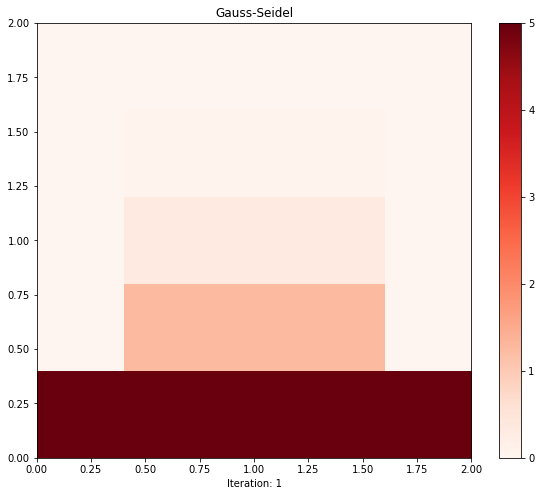

In [68]:
N = 5

# Create a test input vector u setting the boundary conditions.

u = np.zeros((N, N), dtype=np.float64)

u[N - 1, :] = 5.0

# Create the output vector v.

v = np.copy(u)

# Call the Gauss-Seidel iteration function.

gauss_seidel_iteration(N, u, v)

# Plot the results.

plot(v, 'Gauss-Seidel', 1)

## Correctness Testing - Repeated Function Invocations

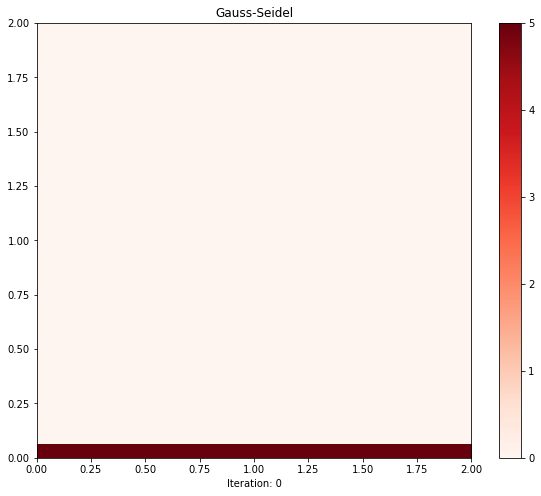

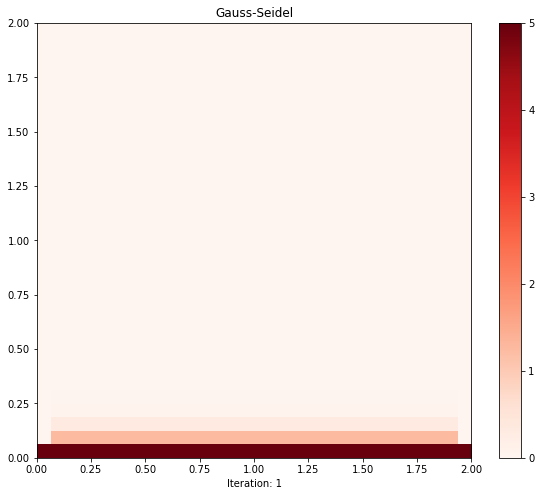

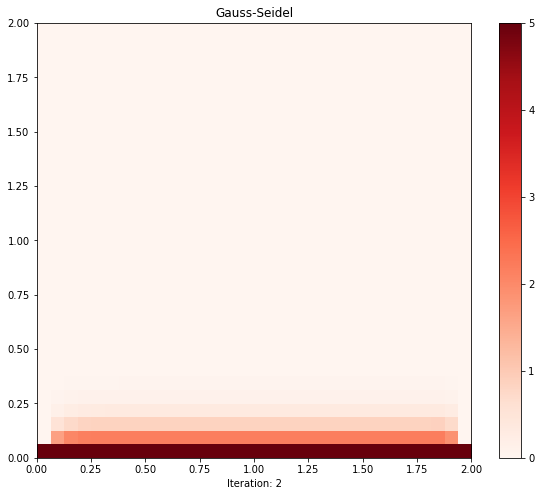

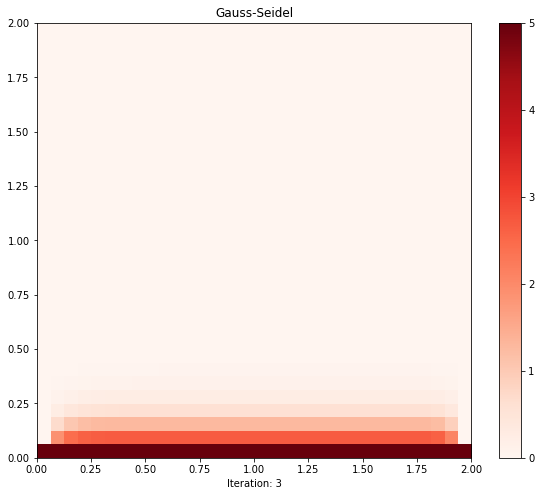

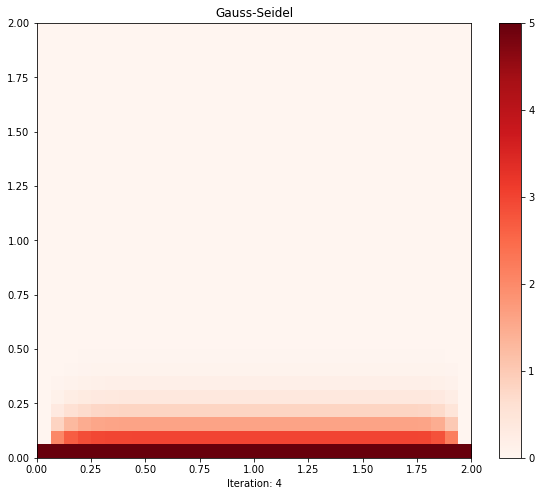

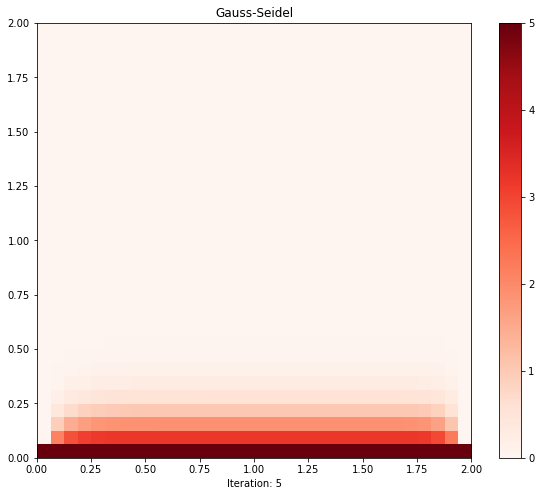

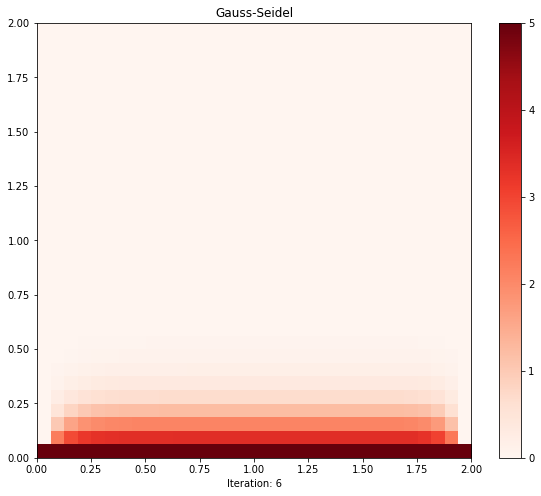

In [69]:
# Repeated calls to gauss_seidel_iteration() with the result plotted.

N = 32

u = np.zeros((N, N), dtype=np.float64)

u[N - 1, :] = 5.0

v = np.copy(u)

plot(v, 'Gauss-Seidel', 0)

for i in range(6):
    gauss_seidel_iteration(N, u, v)
    plot(v, 'Gauss-Seidel', i + 1)
    u = v

## Determine t*

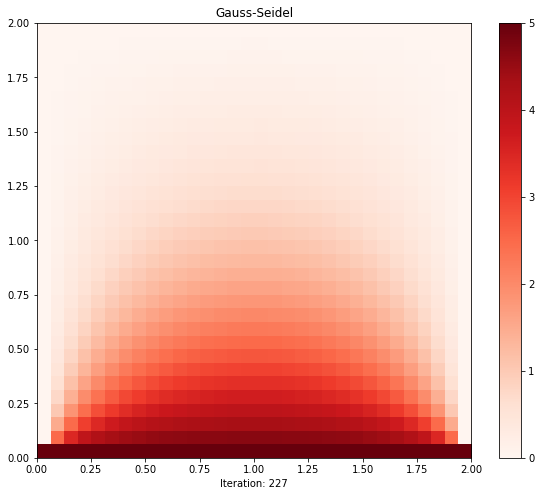

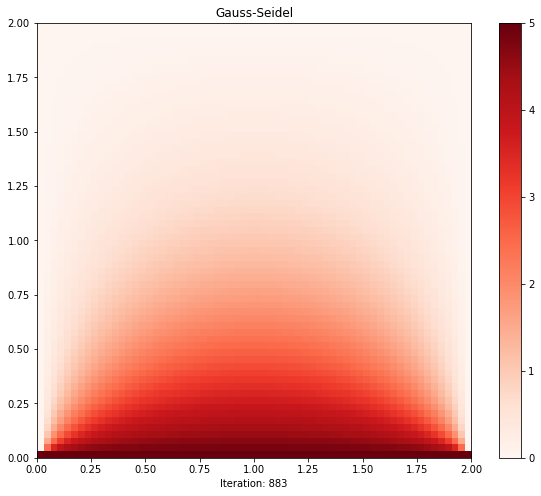

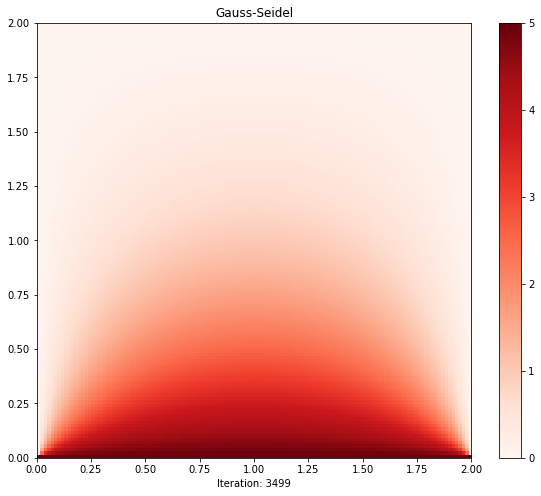

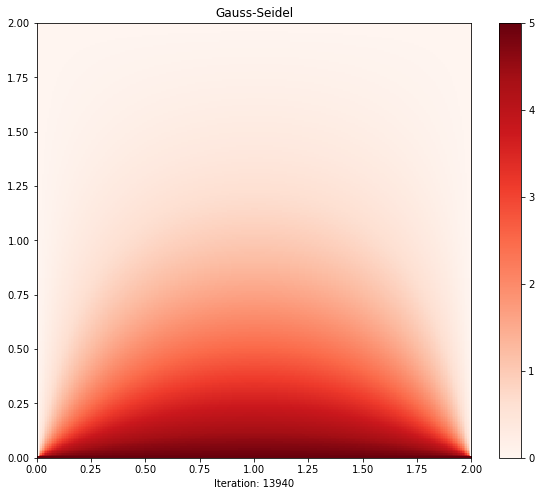

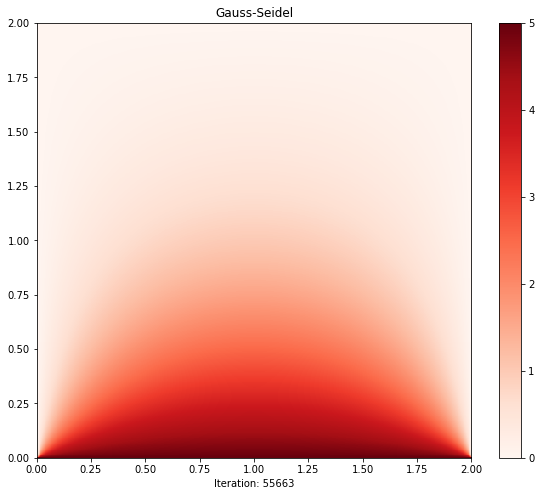

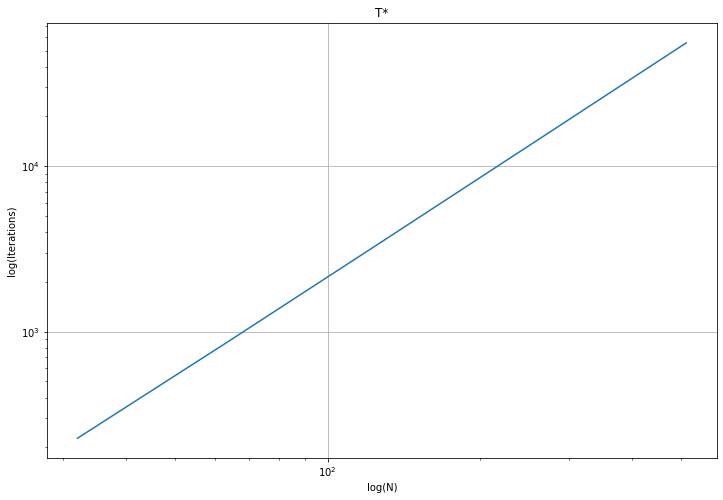

In [82]:
N = [32, 64, 128, 256, 512]

T = np.zeros((len(N)), dtype=np.int32)

for i, n in enumerate(N):
    
    u = np.zeros((n, n), dtype=np.float64)

    u[n - 1, :] = 5.0

    v = np.copy(u)

    iteration = 0;

    while v[(n - 1) // 2, (n - 1) // 2] < 1.0:
        gauss_seidel_iteration(n, u, v)
        iteration += 1
        u = v

    plot(v, 'Gauss-Seidel', iteration)
    
    T[i] = iteration


plt.figure(figsize=(12, 8))
plt.loglog(N, T)
plt.xlabel('log(N)')
plt.ylabel('log(Iterations)')
plt.title('T*')
plt.grid()
plt.show()